In [32]:
from sklearn.metrics import mutual_info_score
#from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
import seaborn as sns
import pandas as pd

# Mathematical Underpinnings - Lab 4

Tests to verify hipoteses of independence (from Lab 4):

In [33]:
def indep_test_asymptotic(X, Y, stat):

    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

def indep_test_permutation(X, Y, B, stat="mi"):

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

In [34]:
def mutual_info_score(X, Y):
    conting = pd.crosstab(X, Y).values
    conting = conting / np.sum(conting)

    current_sum = 0

    for i in range(conting.shape[0]):
        for j in range(conting.shape[1]):
    
            if conting[i, j] != 0:
                current_sum += conting[i, j] * np.log(
                    conting[i, j] / (np.sum(conting[i, :]) * np.sum(conting[:, j]))
                )

    return current_sum

def conditional_mututal_info_score(X, Y, Z):

    uniq_z_vals = np.unique(Z)
    prob_z_vals = np.array([np.sum(Z == z_value) for z_value in uniq_z_vals]) / len(Z)
    cmi_score = 0 

    for i, z_value in enumerate(uniq_z_vals):
        x_z = X[Z == z_value]
        y_z = Y[Z == z_value]
        cmi_score += mutual_info_score(x_z, y_z) * prob_z_vals[i]

    return cmi_score

## Task 1

### a)

In [35]:
def asymptotic_conditional_independence_test(X, Y, Z): 
    cmi = conditional_mututal_info_score(X, Y, Z)
    n = len(X)
    stat_val = 2 * n * cmi

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)*len(np.unique(Z))

    p_value = 1 - chi2.cdf(stat_val, df = df)
    return stat_val, p_value

### b)

In [36]:
def cond_permute(X, Z): 
    uniq_z_vals = np.unique(Z)
    X_ = X.copy()

    for z_value in uniq_z_vals: 
        X_[Z == z_value] = np.random.permutation(X_[Z == z_value])

    return X_

def permutation_conditional_independence_test(X, Y, Z, B = 1000):

    cmi = conditional_mututal_info_score(X, Y, Z)
    n = len(X)
    stat_value = 2*n*cmi

    counter = 0

    for _ in range(B): 
        X_b = cond_permute(X, Z)
        cmi_b = conditional_mututal_info_score(X_b, Y, Z)

        if cmi <= cmi_b: 
            counter += 1

    p_value = (1 + counter) / (1 + B)
    
    return stat_value, p_value

### c)

In [37]:
def discretize_pos_neg(e):
    res = np.ones(len(e))
    res[e < 0] = -1
    return res

conditionaly independent

In [38]:
n = 2000
Z_tilde = np.random.uniform(-1, 1, n)
Z = discretize_pos_neg(Z_tilde)
X_tilde = np.random.normal(Z/2, 1, n)
Y_tilde = np.random.normal(Z/2, 1, n)
X = discretize_pos_neg(X_tilde)
Y = discretize_pos_neg(Y_tilde)

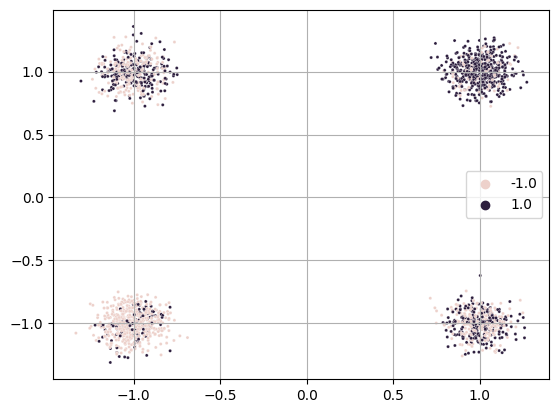

In [39]:
X_noisy = X + np.random.normal(0, 0.1, n)
Y_noisy = Y + np.random.normal(0, 0.1, n)

sns.scatterplot(x = X_noisy, y = Y_noisy, s = 5, hue = Z)
plt.grid()
plt.show()

In [40]:
asymptotic_conditional_independence_test(X, Y, Z)

(1.4151305006984234, 0.49284268641727513)

In [41]:
permutation_conditional_independence_test(X, Y, Z)

(1.4151305006984234, 0.5114885114885115)

conditionaly dependent

In [42]:
X_tilde = np.random.uniform(-1, 1, n)
Y_tilde = np.random.uniform(-1, 1, n)
X = discretize_pos_neg(X_tilde)
Y = discretize_pos_neg(Y_tilde)
Z_tilde = np.random.normal(0, 1, n) + (X + Y)/2
Z = discretize_pos_neg(Z_tilde)

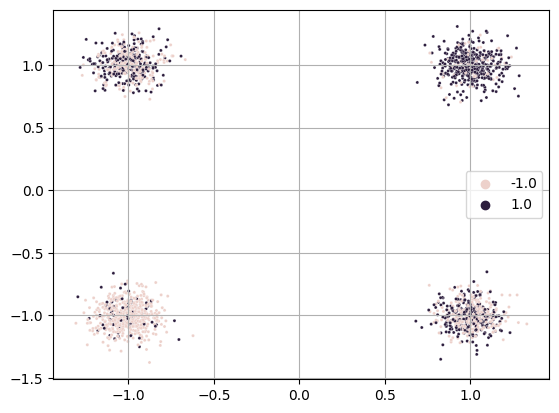

In [43]:
X_noisy = X + np.random.normal(0, 0.1, n)
Y_noisy = Y + np.random.normal(0, 0.1, n)

sns.scatterplot(x=X_noisy, y=Y_noisy, s = 5, hue = Z)
plt.grid()
plt.show()

In [44]:
asymptotic_conditional_independence_test(X, Y, Z)

(34.101235681891815, 3.935598247295502e-08)

In [45]:
permutation_conditional_independence_test(X, Y, Z)

(34.101235681891815, 0.000999000999000999)

## Task 2

In [208]:
def disc_into_two_bins(x):
    x[x < 0] = -1
    x[x >= 0] = 1
    return x

def sample_from_model1(n):
    Z = np.random.normal(size = n)
    Z = disc_into_two_bins(Z)
    X = np.random.normal(Z / 2, size = n)
    Y = np.random.normal(Z / 2, size = n)
    X = disc_into_two_bins(X)
    Y = disc_into_two_bins(Y)
    return X, Y, Z

def sample_from_model2(n):
    X = np.random.normal(size = n)
    X = disc_into_two_bins(X)
    Z = np.random.normal(X / 2, size = n)
    Z = disc_into_two_bins(Z)
    Y = np.random.normal(Z / 2, size = n)
    Y = disc_into_two_bins(Y)
    return X, Y, Z

def sample_from_model3(n):
    X = np.random.normal(size = n)
    Y = np.random.normal(size = n)
    X = disc_into_two_bins(X)
    Y = disc_into_two_bins(Y)
    Z = np.random.normal((X + Y) / 2, size = n)
    Z = disc_into_two_bins(Y)
    return X, Y, Z

### a)

In [225]:
n = 10
sample_from_model1(n)
sample_from_model2(n)
sample_from_model3(n)

(array([ 1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.]),
 array([-1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.]),
 array([-1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.]))

1. dependent and conditionally independent
2. dependent and conditionally independent
3. independent and conditionally dependent

answer:

### b)

### c)